In [2]:
%matplotlib inline
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# EECS 545:  Machine Learning
## Lecture 11:  Bias-Variance Tradeoff, Cross Validation, ML Advice
* Instructor:  **Jacob Abernethy**
* Date:  February 17, 2015

*Lecture Exposition Credit: Valli & Ben*

### Today's Lecture: * Machine Learning Advice * 
- How does one go about choosing and applying an ML algorithm?
- How does one improve the performance of an ML algorithm?

### A Question to Ponder
#### What is the goal of Machine Learning and ML algorithms?

Common Goal:
   - Not to learn an exact representation of the training data itself. 
   - Build a statistical model of the process which generates the data (Statistical Inference).
   - This is important if the algorithm is to have good generalization performance.

### At the beginning...

- Suppose you are given some dataset and are asked to analyze it
    - research project, data science job, homework assignment...
- What is the first thing you will do once you are given this task?

### Mysterious Data...

In [22]:
from sklearn.datasets import make_classification
X, y = make_classification(1000, n_features=5, n_informative=2, 
                           n_redundant=2, n_classes=2, random_state=0)

from pandas import DataFrame
df = DataFrame(np.hstack((X, y[:, None])), 
               columns = list(range(5)) + ["class"])

In [3]:
df[:5]

,0,1,2,3,4,class
0,-0.744656,-1.002108,-0.229806,0.834371,0.250114,0
1,1.798666,-0.022413,1.666616,0.980480,-0.404352,1
2,-0.940481,-1.219292,-0.311325,0.996956,-2.005125,0
3,0.567027,0.260004,0.403881,-0.018421,-1.033165,1
4,1.352852,-0.507426,1.476739,1.339058,-1.572796,1


### Where to start?

Analyze the data and preprocess using simple statistical measurements and tools. Look for:
 - Number of features? Number of classes? (for classification)
 - Mean, Median, Mode?
 - Correlation? 
 - Dataset size? Missing samples?
 - Are samples labeled?

### Data Visualization

**Pro:** Can often be more useful than mathematical statistical analysis to get a good grasp of what the dataset looks like.
- *"Big Picture"* view

**Con:** High-dimensional data can be hard to visualize.
- Projections may be misleading.

Visualizations of the *mysterious dataset* follow...

### Pairwise Feature Plot

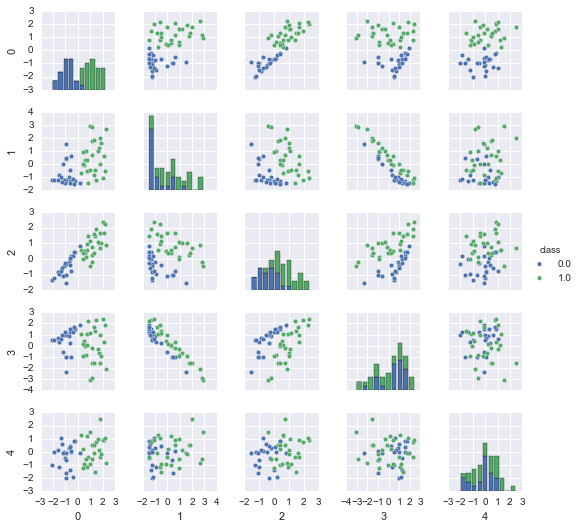

In [24]:
# Pairwise feature plot
_ = sns.pairplot(df[:50], vars=[0, 1, 2, 3, 4], hue="class", size=1.5)

### Correlation Plot

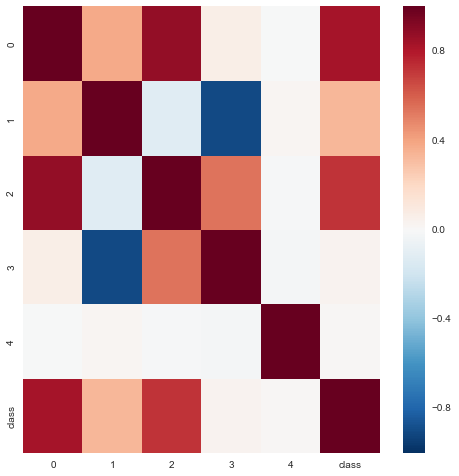

In [23]:
# Correlation Plot
plt.figure(figsize=(8, 8));
_ = sns.heatmap(df.corr(), annot=False)

### General Approaches to a Data Problem

After doing some visualization and simple statistical analysis or preprocessing of data, how should one proceed?

### Approach 1: Careful Design 
- Things to do:
 - Engineer/Select exactly the right features.
 - Collect the right dataset.
 - Design the right algorithms.
- Implement and hope it works.

### Approach 1:  Careful Design

- Pros: 
 - Can lead to new, elegant and scalable algorithms. 
 - Contributions to ML theory are generally done using this approach.
- Cons: 
 - Can be time consuming. Slow time to market for companies. 
 - "Premature optimization is the root of all evil." - Donald Knuth (Note: while this quote was intended to talk about programming, premature statistical optimizatio can also be quite evil.)

### Approach 2: Build and Fix
- Implement something quickly.
- Run error analyses and diagnoses to see if anything can be improved. Repeat until some performance criteria is met or goal is reached.

### Approach 2:  Build and Fix

Pros: 
- Easy especially with vast computing resources (can try different methods more easily). 
- Fast time to market.

Cons: 
- Not systematic. 
- Can miss out on the reasoning behind why a model works well. 

### Choosing a Method

Not easy to immediately decide what to use. Some things to consider first: 
- Supervised vs. Unsupervised vs. Semi-supervised vs. Active Learning vs. Reinforcement Learning ...?
- Generative vs. Discriminative? 
- Parametric vs. Non-parametric?

### Choosing a Method

Still wondering how to go about choosing methods from an applied viewpoint? 
 - There are many guides (see next few slides). 
 - Go ahead and try different algorithms! (Similar to approach 2) We will also talk about how to measure performance and deal with poor performance later.

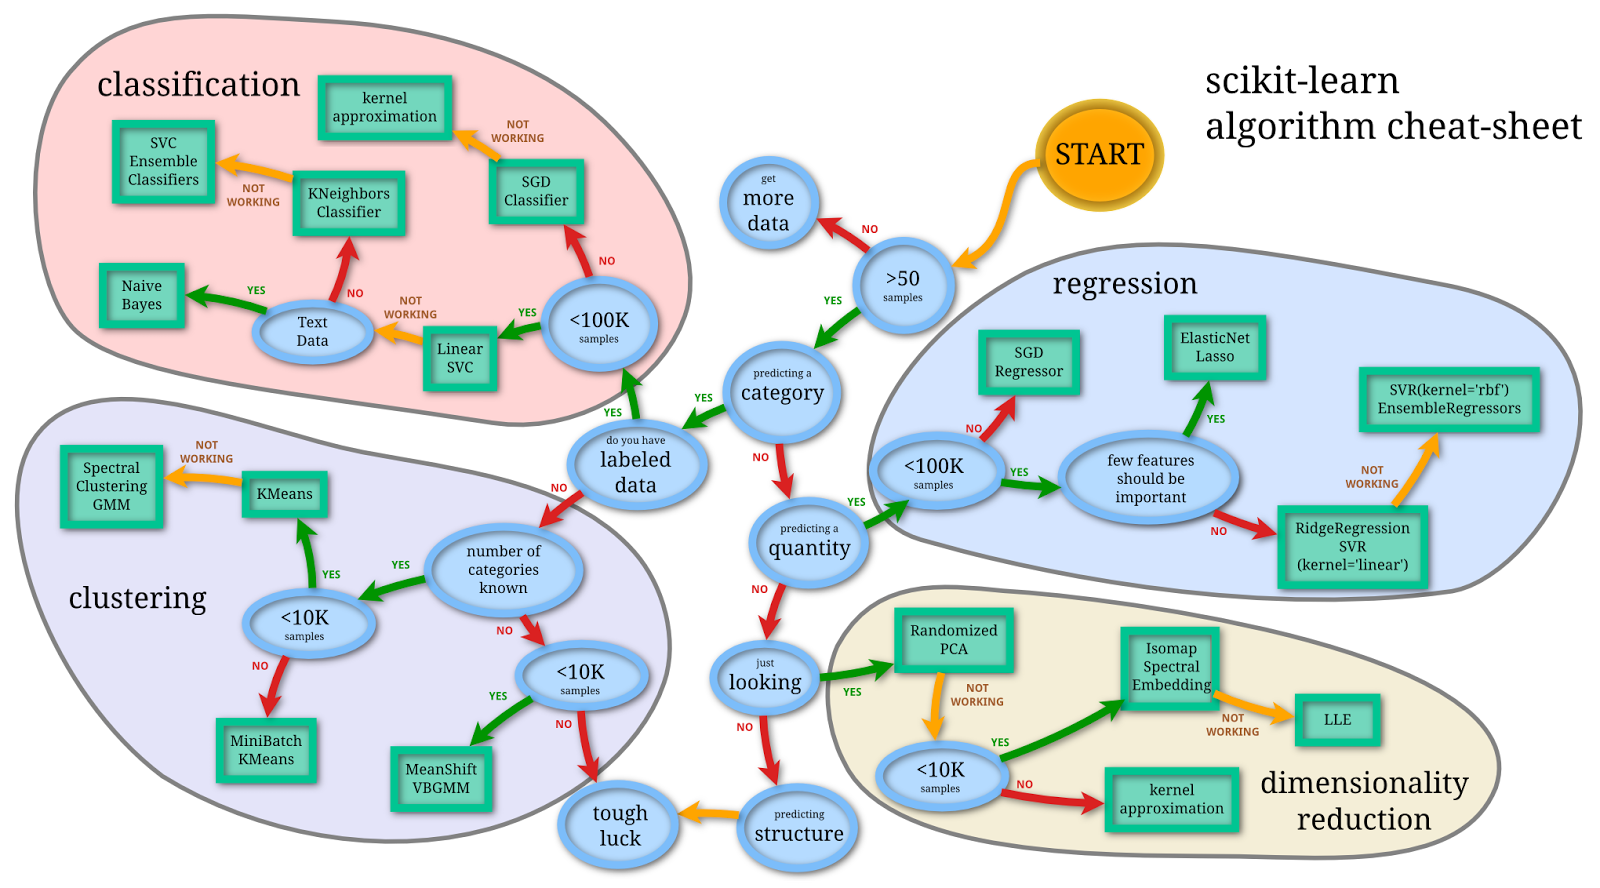

In [6]:
from IPython.display import Image
Image(filename='images/sklearn_sheet.png', width=800, height=600) 

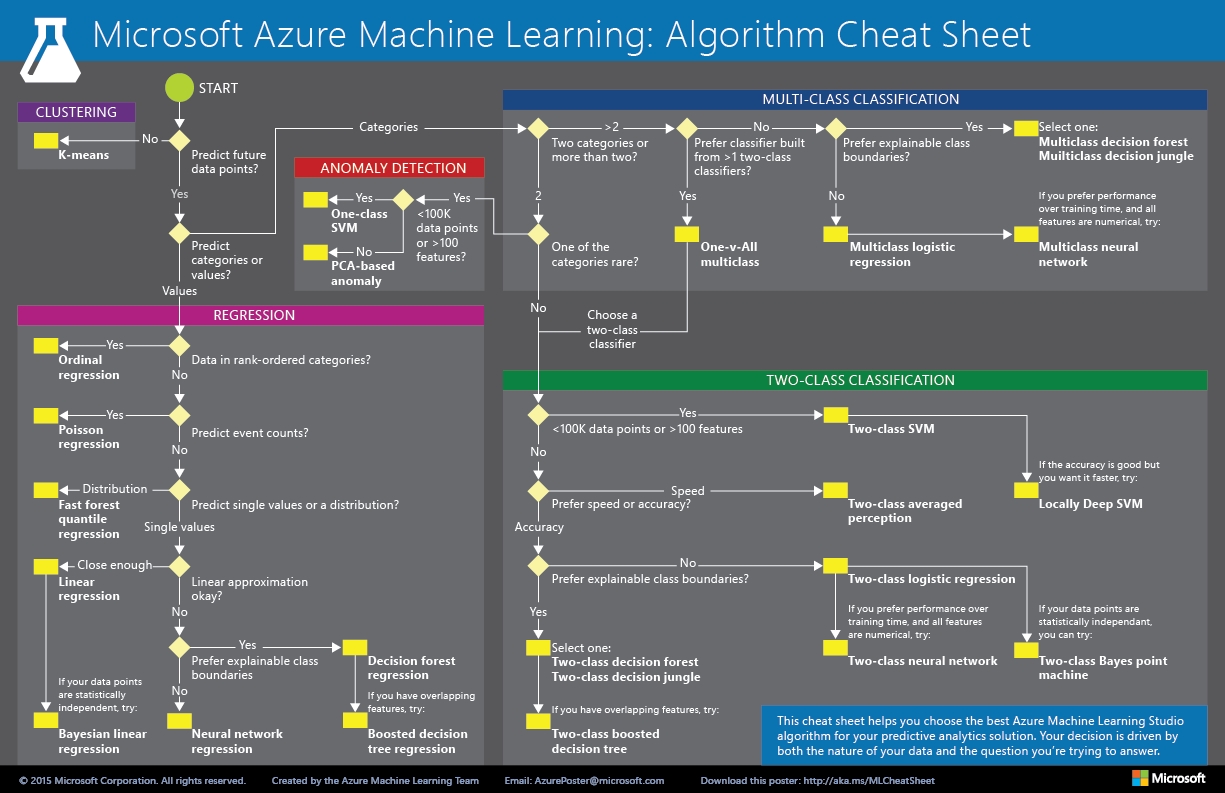

In [7]:
from IPython.display import Image
Image(filename='images/azure_sheet.png', width=800, height=600) 

# Statistical Inference
## Loss Functions & Bias-Variance Decomposition

### Estimators

- ML Algorithms can in general be thought of as "estimators."
> **Estimator:** A statistic (a function of data) that is used to infer the value of an unknown parameter in a statistical model.

- Suppose there is a fixed parameter $f$ that needs to be estimated. An estimator of $f$ is a function that maps the sample space to a set of sample estimates, denoted $\hat{f}$.

### Noise

- For most problems in Machine Learning, the relationship is functional but noisy.

- Mathematically, $y = f(x) + \epsilon$
    - $\epsilon$ is noise with mean $0$ variance $\sigma^2$

### Mathematical Viewpoint

- Let the training set be $D = \{\mathbf{x}_1, ..., \mathbf{x}_n\}, \mathbf{x}_i \in \mathbb{R}^d$.
- **Goal:** Find $\hat{f}$ that minimizes some **Loss function**, $L(y, \hat{f})$, which measures how good predictions are for **both** 
 - Points in $D$ (the **sample**), and, 
 - Points ***out of sample*** (outside $D$).
- Cannot minimize both perfectly because the relationship between $y$ and $\mathbf{x}$ is noisy.
 - ***Irreducible error***.

### Loss Functions

There are many loss functions, each with their own use cases and interpretations. Here are some of them:

- **Quadratic Loss:**  $L(y,\hat{f}) = (y-\hat{f})^2$
- **Absolute Loss:**  $L(y,\hat{f}) = |{y-\hat{f}}|$
- **Zero-One Loss:**  $L(y,\hat{f}) = \mathbb{1}_{(y \neq \hat{f})}$
- **Sigmoid Loss:**  $L(y,\hat{f}) = \mathrm{sigmoid}(y-\hat{f})$
- **Hinge Loss:**  $L(y,\hat{f}) = \max(0, 1-y \cdot \hat{f})$
- **Log Loss:**  $L(y,\hat{f}) = \log[ 1 + \exp(y-\hat{f})]$
- **Exponential Loss:**  $L(y,\hat{f}) = \exp[ \hat{f} - y ]$

### Choosing a Loss Function (1)

- How should we treat **outliers**?
- How **"correct"** do we need to be?
    - Do we want a **margin** of safety?

### Choosing a Loss Function (2)

- Is the **interpretation** of the loss important?
    - Calibrated vs. Uncalibrated probabilities
    
- How are the models already performing? (Should we change the loss functions or tweak involved parameters?)
    - **Performance**: "Strong"? ($ \gg 50\%$ accuracy), "Weak"? (Around or slightly above $50\%$ accuracy)
    - High Bias? High Variance? (We will talk about this later.)

### Quadratic Loss

 - Commonly used for regression
 - Heavily influenced by outliers
 
$$
L(y, \hat{f}) = (y - \hat{f})^2
$$

### Quadratic Loss:  Plot

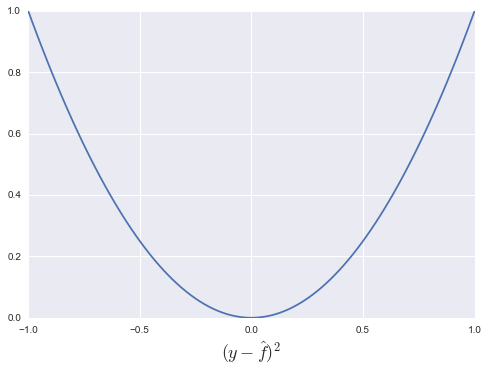

In [5]:
x = np.linspace(-1, 1, 100);
plt.plot(x, x**2)
plt.xlabel("$(y-\hat{f})^2$", size=18);

### Absolute Loss

- Commonly used for regression.
- Robust to outliers.

$$
L(y, \hat{f}) = |y - \hat{f}|
$$

### Absolute Loss:  Plot

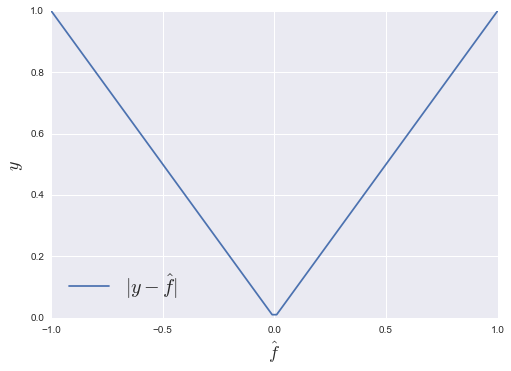

In [23]:
x = np.linspace(-1, 1, 100);
plt.plot(x, np.abs(x), label="$|y-\hat{f}|$"); 
plt.legend(loc="best", prop={'size':20})
plt.xlabel("$\hat{f}$", size=18);
plt.ylabel("$y$", size=18)

### 0-1 Loss

 - Used for classification. 
 - Not convex! 
  - Not practical since optimization problems become intractable!
  - "Surrogate Loss functions" that are convex and differentiable can be used instead.
  
$$
L(y, \hat{f}) = \mathbb{1}_{(y \neq \hat{f})}
$$

### 0-1 Loss: Plot

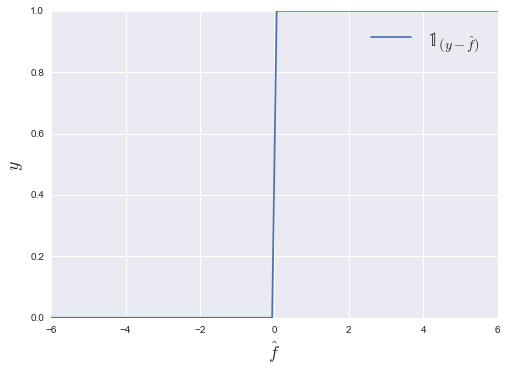

In [26]:
x = np.linspace(-6, 6, 100);
plt.plot(x, x > 0, label="$\mathbb{1}_{(y-\hat{f})}$");
plt.legend(loc="best", prop={'size':20})
plt.xlabel("$\hat{f}$", size=18);
plt.ylabel("$y$", size=18)

### Sigmoid Loss

 - Convex and Differentiable! Can be used for classification.
 - Used in Neural Networks as an activation function (to provide nonlinearity and differentiability).
 
$$L(y,\hat{f}) = \mathrm{sigmoid}(y-\hat{f})$$

### Sigmoid Loss:  Plot

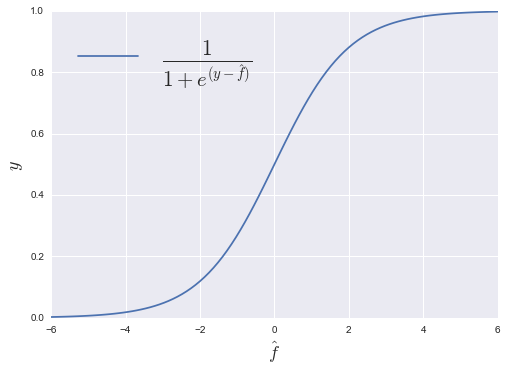

In [3]:
x = np.linspace(-6, 6, 100);
plt.plot(x, 1/(1 + np.exp(-x)), label="$\\frac{1}{1 + e^{(y - \hat{f})}}$");
plt.legend(loc="best", prop={'size':30})
plt.xlabel("$\hat{f}$", size=18);
plt.ylabel("$y$", size=18)

### Log Loss

 - Used in Logistic regression.
 - Influenced by outliers. 
 - Provides well calibrated probabilities (can be interpreted as confidence levels).
 
$$L(y,\hat{f}) = \log[ 1 + \exp(\hat{f}-y)]$$

### Log Loss:  Plot

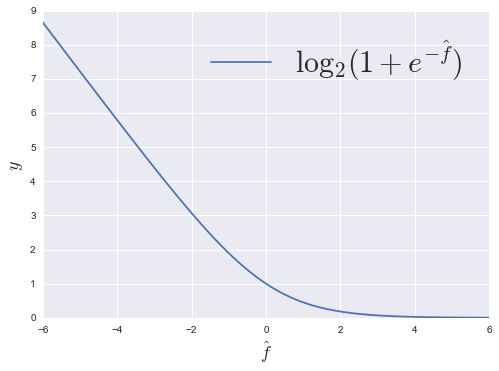

In [13]:
x = np.linspace(-6, 6, 100);
plt.plot(x, np.log2(1 + np.exp(-x)), label="$\log_2(1 + e^{-\hat{f}})$");
plt.legend(loc="best", prop={'size':30})
plt.xlabel("$\hat{f}$", size=18);
plt.ylabel("$y$", size=18)

### Hinge Loss

 - Used in SVMs. 
 - Robust to outliers.
 - Do not provide well calibrated probabilities.

$$L(y,\hat{f}) = \max(0, 1-y \cdot \hat{f})$$


### Hinge Loss: Plot

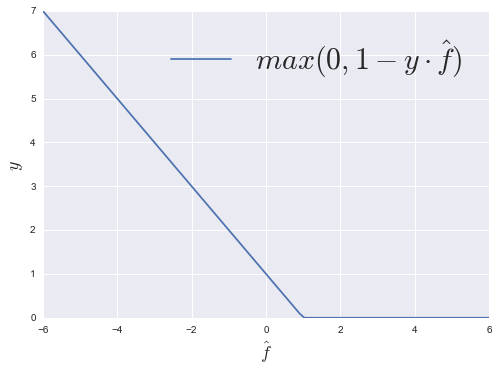

In [15]:
x = np.linspace(-6, 6, 100);
plt.plot(x, np.where(x < 1, 1 - x, 0), label="$max(0, 1 - y \cdot \hat{f})$");
plt.legend(loc="best", prop={'size':30})
plt.xlabel("$\hat{f}$", size=18);
plt.ylabel("$y$", size=18)

### Exponential Loss

- Used for Boosting (Learning from weak models)
- Very susceptible to outliers.
 
$$L(y,\hat{f}) = \exp(\hat{f}-y)$$

### Exponential Loss:  Plot 

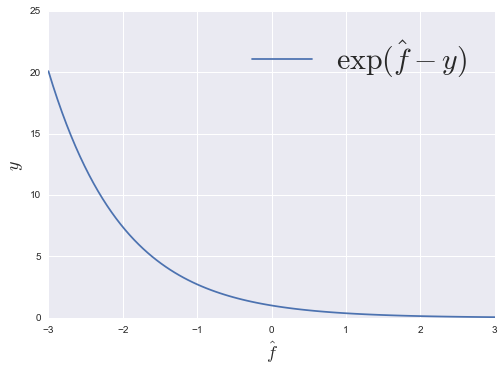

In [18]:
x = np.linspace(-3, 3, 100);
plt.plot(x, np.exp(-x), label = "$\exp(\hat{f} - y)$");
plt.legend(loc="best", prop={'size':30})
plt.xlabel("$\hat{f}$", size=18);
plt.ylabel("$y$", size=18)

### Loss Functions:  Comparison

In [53]:
# adapted from http://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_loss_functions.html
def plot_loss_functions():
    xmin, xmax = -4, 4
    xx = np.linspace(xmin, xmax, 100)
    plt.plot(xx, xx ** 2, 'm-',
             label="Quadratic loss")
    plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], 'k-',
             label="Zero-one loss")
    plt.plot(xx, 1/(1 + np.exp(xx)), 'b-',
             label="Sigmoid loss")
    plt.plot(xx, np.where(xx < 1, 1 - xx, 0), 'g-',
             label="Hinge loss")
    plt.plot(xx, np.log2(1 + np.exp(-xx)), 'r-',
             label="Log loss")
    plt.plot(xx, np.exp(-xx), 'c-',
             label="Exponential loss")
    plt.ylim((0, 8))
    plt.legend(loc="best")
    plt.xlabel(r"Decision function $f(x)$")
    plt.ylabel("$L(y, f)$")

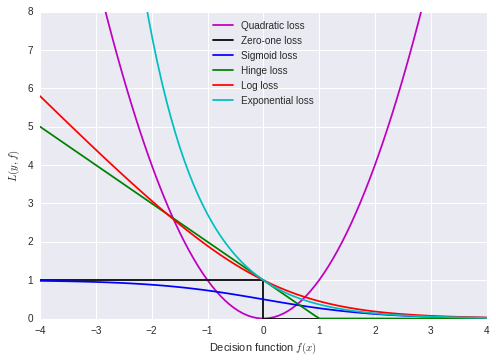

In [54]:
# Demonstrate some loss functions
plot_loss_functions()

### Risk

**Risk** is the expected loss or error. 
- Note that we normally cannot find the true risk of a function. 
- We can however find the ***Empirical Risk***.
 - Idea: Estimate the true risk with *labeled* data. 

### Examples of Empirical Risk 

There are 2 very commonly used initialisims in ML. These in fact correspond to Empricial Risk:

* Mean Absolute Error (MAE), Empirical Risk with Absolute Error Loss
    - $\frac{1}{n} \sum_{i = 1}^n |y_i - \hat{f}(x_i)|$
 
* Mean Squared Error (MSE), Empirical Risk with Quadratic Loss
    - $\frac{1}{n} \sum_{i = 1}^n (y_i - \hat{f}(x_i))^2$

### Empirical Risk Minimization (ERM)

* ERM is a framework under which most any Supervised Learning algorithm can be described.
* Assuming that the goal is to be able to learn the training data well, we are then trying to solve the following problem:

    $$\min_{f \in \mathcal{F}} \frac{1}{n} \sum_{i = 1}^n L(y_i, \hat{f}(x_i)) + \lambda \Omega(\hat{f}), \lambda \geq 0$$
    
* Not a good idea to just have the above as a goal for an ML problem. Why? Overfitting!

### Bias-Variance Decomposition

- Can decompose the expected loss (risk) into a **bias** term and **variance** term.
- We want to learn a model with
    - Small bias (how well a model fits the data on average)
    - Small variance (how stable a model is w.r.t. data samples)

### Bias Variance Decomposition Setup
Let us consider **quadratic loss** $L(y,\hat{f}) = (y-\hat{f})^2$ as it makes the decomposition of expected loss easier.
- Associated risk is $R(\hat{f}) = \mathbb{E}_y[L(y, \hat{f})] = \mathbb{E}_y[(y-\hat{f})^2]$

### Bias-Variance Decomposition

$$
\begin{align}
\mathbb{E}[(y - \hat{f})^2]
&= \mathbb{E}[y^2 - 2 \cdot y \cdot \hat{f} + {\hat{f}}^2] \\
&= \mathbb{E}[y^2] - \mathbb{E}[2 \cdot y \cdot \hat{f}] + \mathbb{E}[{\hat{f}}^2] \\
&= \mathrm{Var}[y] + {\mathbb{E}[y]}^2 - \mathbb{E}[2 \cdot y \cdot \hat{f}] + 
   \mathrm{Var}[\hat{f}] + {\mathbb{E}[{\hat{f}}]}^2
\end{align}
$$

since $Var[X] = \mathbb{E}[{X}^2] - {\mathbb{E}[X]}^2 \implies \mathbb{E}[X^2] = Var[X] + {\mathbb{E}[X]}^2$

### Bias-Variance Decomposition

$$\begin{align} \mathbb{E}[y] &= \mathbb{E}[f + \epsilon] \\
               &= \mathbb{E}[f] + \mathbb{E}[\epsilon] & \text{ (linearity of expectations)}\\
               &= \mathbb{E}[f] + 0 &\text{(zero-mean noise)}\\
               &= f & \text{ (} f \text{ is determinstic)}\end{align}$$

### Bias-Variance Decomposition

$$\begin{align} Var[y] &= \mathbb{E}[(y - \mathbb{E}[y])^2] \\
                      &= \mathbb{E}[(y - f)^2] \\
                      &= \mathbb{E}[(f + \epsilon - f)^2] \\
                      &= \mathbb{E}[\epsilon^2] \equiv \sigma^2 \end{align}$$

### Bias-Variance Decomposition

We just showed that:
- $\mathbb{E}[y] = f$  
- $\mathrm{Var}[y] = \mathbb{E}[\epsilon^2] = \sigma^2$
                
Therefore, 

$$
\begin{align}
\mathbb{E}[(y - \hat{f})^2]
&= Var[y] + {\mathbb{E}[y]}^2 - \mathbb{E}[2 \cdot y \cdot \hat{f} + Var[\hat{f}] + {\mathbb{E}[{\hat{f}}]}^2 \\
&= \sigma^2 + f^2 - \mathbb{E}[2 \cdot y \cdot \hat{f}] + Var[\hat{f}] + {\mathbb{E}[{\hat{f}}]}^2
\end{align}
$$

### Bias-Variance Decomposition

- Note $y$ is random ***only*** in $\epsilon$ (again, $f$ is deterministic). 
- Also, $\epsilon$ is ***independent*** from $\hat{f}$.

$\begin{align}\mathbb{E}[2 \cdot y \cdot \hat{f}] 
                      &= \mathbb{E}[2 \cdot y \cdot \hat{f}]\\
                      &= \mathbb{E}[2 \cdot y] \cdot \mathbb{E}[\hat{f}] & \text{ (by independence) }\\
                      &= 2 \cdot \mathbb{E}[y] \cdot \mathbb{E}[\hat{f}] \\
                      &= 2 \cdot f \cdot \mathbb{E}[\hat{f}] \end{align}$
   
Thus, we now have $\mathbb{E}[(y - \hat{f})^2] = \sigma^2 + f^2 - 2 \cdot f \cdot \mathbb{E}[\hat{f}] + Var[\hat{f}] + {\mathbb{E}[{\hat{f}}]}^2$

### Bias-Variance Decomposition

$\mathbb{E}[(y - \hat{f})^2] = \sigma^2 + Var[\hat{f}] + f^2 - 2 \cdot f \cdot \mathbb{E}[\hat{f}] + {\mathbb{E}[{\hat{f}}]}^2$

Now, $f^2 - 2 \cdot f \cdot \mathbb{E}[\hat{f}] + \mathbb{E}[\hat{f}]^2 = (f - \mathbb{E}[\hat{f}])^2$ 

$\implies \mathbb{E}[(y - \hat{f})^2] = \sigma^2 + Var[\hat{f}] + (f - \mathbb{E}[\hat{f}])^2$

$\begin{align} \text{Finally, } \mathbb{E}[f - \hat{f}] 
                        &= \mathbb{E}[f] - \mathbb{E}[\hat{f}] \text{ (linearity of expectations)} \\
                        &= f - \mathbb{E}[\hat{f}] \end{align}$
                     
So, $\mathbb{E}[(y - \hat{f})^2] = \sigma^2 + Var[\hat{f}] + {\mathbb{E}[f - \hat{f}]}^2$

### Bias-Variance Decomposition

$\mathbb{E}[(y - \hat{f})^2] = \underbrace{{\sigma^2}}_\text{irreducible error} + \overbrace{{Var[\hat{f}]}}^\text{Variance} + \underbrace{{\mathbb{E}[f - \hat{f}]}^2}_{\text{Bias}^2}$

### Bias and Variance Formulae

Bias of an estimator, $B(\hat{\theta}) = \mathbb{E}[\hat{\theta}] - \theta$

Variance of an estimator, $Var(\hat{\theta}) = \mathbb{E}[(\hat{\theta} - \mathbb{E}[\hat{\theta}])^2]$

### An example to explain Bias/Variance and illustrate the tradeoff 

- Consider estimating a sinusoidal function. 

(Example that follows is inspired by Yaser Abu-Mostafa's CS 156 Lecture titled "Bias-Variance Tradeoff"

In [10]:
import pylab as pl
def plot_fit(x, y, p, show):
    xfit = np.linspace(0, 2, 1000)
    yfit = np.polyval(p, xfit)
    if show:
        pl.scatter(x, y, c='k')
        pl.plot(xfit, yfit)
        pl.hold('on')
        pl.xlabel('x')
        pl.ylabel('y')

In [11]:
def calc_errors(p):
    x = np.linspace(0, 2, 1000)
    errs = []
    for i in x:
        errs.append(abs(np.polyval(p, i) - np.sin(np.pi * i)) ** 2)
    return errs

In [12]:
def polyfit_sin(degree, iterations, num_points=2, show=True):
    total = 0
    l = []
    coeffs = []
    errs = [0] * len(np.linspace(0, 2, 1000))
    for i in range(iterations):
        np.random.seed()
        x = 2 * np.random.random(num_points) # Pick random points from the sinusoid with co-domain [0, 2)
        y = np.sin(np.pi * x)
        p = np.polyfit(x, y, degree)  
        y_poly = [np.polyval(p, x_i) for x_i in x]  
        plot_fit(x, y, p, show)
        total += sum(abs(y_poly - y) ** 2) # calculate Squared Error (Squared Error) 
        coeffs.append(p)
        errs = np.add(calc_errors(p), errs)
    return total / iterations, errs / iterations, np.mean(coeffs, axis = 0), coeffs

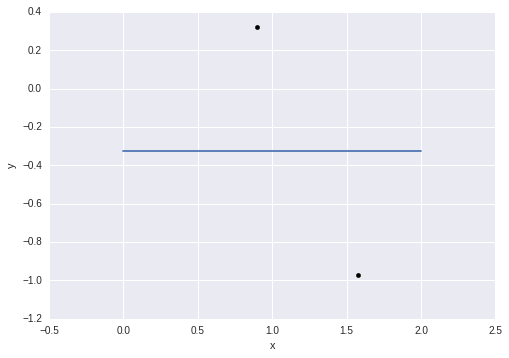

In [13]:
# Estimate two points of sin(pi * x) with a constant once
# Ignore return values for now, we will return to these later
_, _, _, _ = polyfit_sin(0, 1)

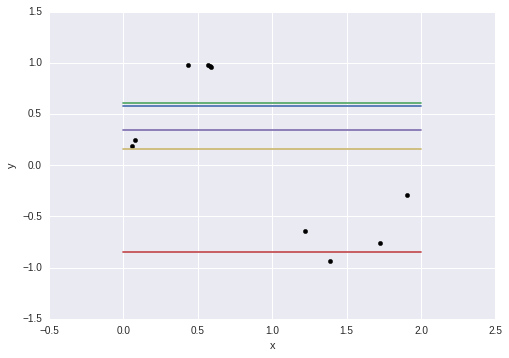

In [14]:
# Estimate two points of sin(pi * x) with a constant 5 times
_, _, _, _ = polyfit_sin(0, 5)

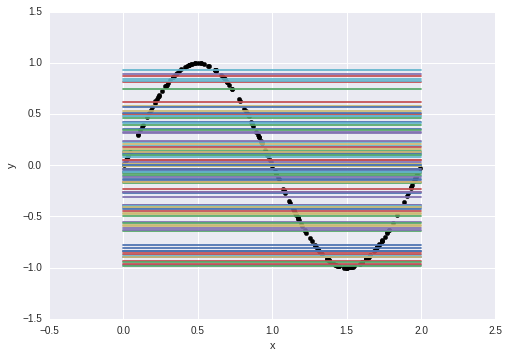

In [15]:
# Estimate two points of sin(pi * x) with a constant 100 times
_, _, _, _ = polyfit_sin(0, 100)

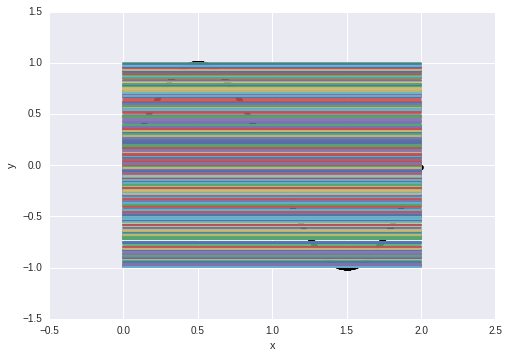

In [16]:
# Estimate two points of sin(pi * x) with a constant 500 times
MSE, errs, mean_coeffs, coeffs_list = polyfit_sin(0, 500)

In [17]:
x = np.linspace(0, 2, 1000)

# Polynomial with mean coeffs.
p = np.poly1d(mean_coeffs)

# Calculate Bias
errs_ = []
for i in x:
    errs_.append(abs(np.sin(np.pi * i) - np.polyval(p, i)) ** 2)
print("Bias: "  + str(np.mean(errs_)))

Bias: 0.499520246251


In [18]:
x = np.linspace(0, 2, 1000)

diffs = []

# Calculate Variance
for coeffs in coeffs_list:
    p = np.poly1d(coeffs)
    for i in x:
        diffs.append(abs(np.polyval(np.poly1d(mean_coeffs), i) - np.polyval(p, i)) ** 2)  
print("Variance: "  + str(np.mean(diffs)))

Variance: 0.253135372191


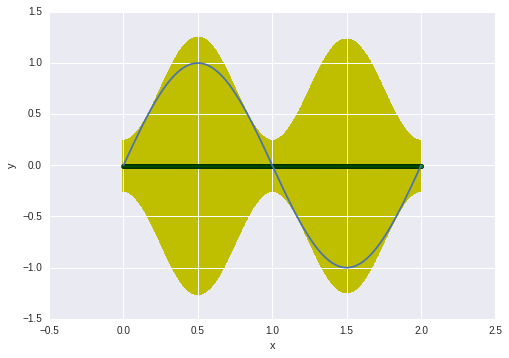

In [19]:
# Error Bars plot

xfit = np.linspace(0, 2, 1000)
yfit = np.polyval(np.poly1d(mean_coeffs), xfit)
pl.scatter(xfit, yfit, c='g')
pl.hold('on')
pl.plot(xfit, np.sin(np.pi * xfit))
pl.errorbar(xfit, yfit, yerr = errs, c='y', ls="None", zorder=0)
pl.xlabel('x')
pl.ylabel('y')

2.00296714216e-31


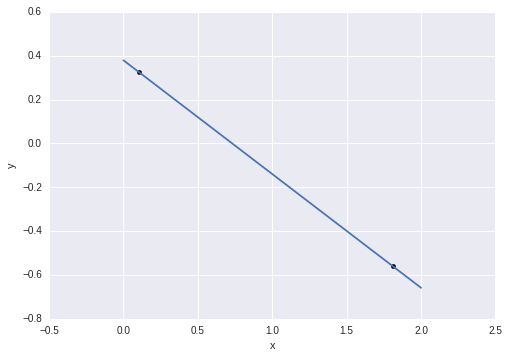

In [20]:
# Estimate two points of sin(pi * x) with a line 1 times
MSE, _, _, _ = polyfit_sin(1, 1)
print(MSE)
# Note: Perfect fit! (floating point math cause non-zero MSE)

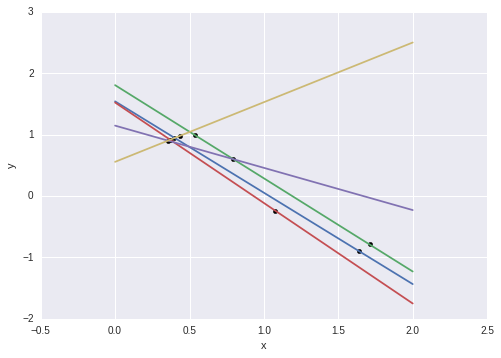

In [21]:
# Estimate two points of sin(pi * x) with a line 5 times
_, _, _, _ = polyfit_sin(1, 5)

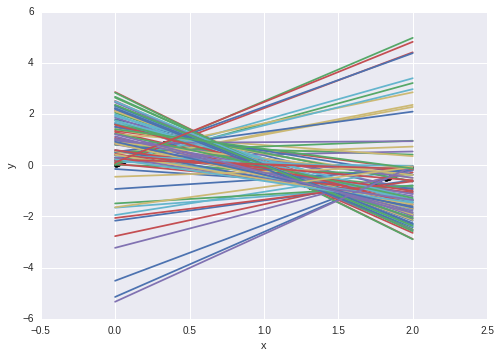

In [22]:
# Estimate two points of sin(pi * x) with a line 100 times
_, _, _, _ = polyfit_sin(1, 100)

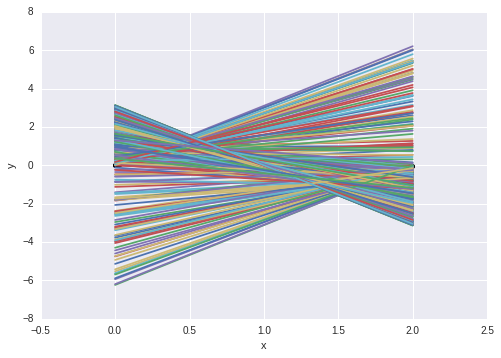

In [23]:
# Estimate two points of sin(pi * x) with a line 500 times
MSE, errs, mean_coeffs, coeffs = polyfit_sin(1, 500)

In [24]:
x = np.linspace(0, 2, 1000)

# Polynomial with mean coeffs.
p = np.poly1d(mean_coeffs)

# Calculate Bias
errs_ = []
for i in x:
    errs_.append(abs(np.sin(np.pi * i) - np.polyval(p, i)) ** 2)
print("Bias: " + str(np.mean(errs_)))

Bias: 0.2133746766


In [25]:
x = np.linspace(0, 2, 1000)

diffs = []

# Calculate Variance
for coeff in coeffs:
    p = np.poly1d(coeff)
    for i in x:
        diffs.append(abs(np.polyval(np.poly1d(mean_coeffs), i) - np.polyval(p, i)) ** 2)  
print("Variance: "  + str(np.mean(diffs)))

Variance: 1.80865234034


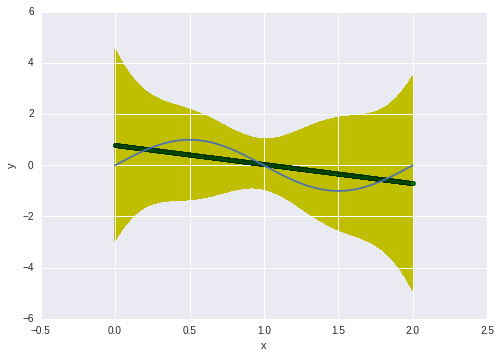

In [26]:
# Error bars plot

xfit = np.linspace(0, 2, 1000)
yfit = np.polyval(np.poly1d(mean_coeffs), xfit)
pl.scatter(xfit, yfit, c='g')
pl.hold('on')
pl.plot(xfit, np.sin(np.pi * xfit))
pl.errorbar(xfit, yfit, yerr = errs, c='y', ls="None", zorder=0)
pl.xlabel('x')
pl.ylabel('y')

### Summary

- Simpler Model (Constant)
 - High(er) Bias: $\approx 0.5$
 - Low(er) Variance: $\approx 0.25$
- More Complex Model (Affine)
 - Low(er) Bias: $\approx 0.21$
 - High(er) Variance: $\approx 1.6$ ($ \gg 0.25!)$

Moral: (According to generalization performance) a constant is a better model than a linear model for approximating a sinusoid!

### Bias Variance Tradeoff

#### Central problem in supervised learning. 

Ideally, one wants to choose a model that both accurately captures the regularities in its training data, but also generalizes well to unseen data. Unfortunately, it is typically impossible to do both simultaneously. 

- High Variance: 
 - Model represents the training set well. 
 - Overfit to noise or unrepresentative training data. 
 - Poor generalization performance


- High Bias: 
 - Simplistic models.
 - Fail to capture regularities in the data.
 - May give better generalization performance.

### Interpretations of Bias
 - Captures the errors caused by the simplifying assumptions of a model.
 - Captures the average errors of a model across different training sets.

### Interpretations of Variance
 - Captures how much a learning method moves around the mean. 
 - How different can one expect the hypotheses of a given model to be?
 - How sensitive is an estimator to different training sets?

### Complexity of Model

- Simple models generally have high bias and complex models generally have low bias. 
- Simple models generally have low variance andcomplex models generally have high variance.


- Underfitting / Overfitting
 - High variance is associated with overfitting.
 - High bias is associated with underfitting.

### Training set size
 
- Decreasing the training set size
 - Helps with a high bias algorithm: 
  - Will in general not help in improving performance. 
  - Can attain the same performance with smaller training samples however.
  - Additional advantage of increases in speed.


- Increase the training set size
 - Decreases Variance by reducing overfitting.

### Number of features
- Increasing the number of features.
 - Decreases bias at the expense of increasing the variance.

- Decreasing the number of features.
 - Dimensionality reduction can decrease variance by reducing over-fitting.


### Features 

Many techniques for engineering and selecting features (Feature Engineering and Feature Extraction)
 - PCA, Isomap, Kernel PCA, Autoencoders, Latent sematic analysis, Nonlinear dimensionality reduction, Multidimensional Scaling

### Features

The importance of features
 > "Coming up with features is difficult, time-consuming, requires expert knowledge.  Applied machine learning is basically feature engineering" 
 - Andrew Ng
 
 
 > "... some machine learning projects succeed and some fail.  What makes the difference? Easily the most important factor is the features used." 
 - Pedro Domingo

### Regularization (Changing $\lambda$)

Regularization is designed to impose simplicity by adding a penalty term that depends on the charactistics of the parameters.

- Decrease Regularization. 
 - Reduces bias (allows the model to be more complex).
 
 
- Increase Regularization.
 - Reduces variance by reducing overfitting (again, regularization imposes "simplicity.") 

### Ideal bias and variance?

- All is not lost. Bias and Variance can both be lowered through some methods:
 - Ex: Boosting (learning from weak classifiers).

- The sweet spot for a model is the level of complexity at which the increase in bias is equivalent to the reduction in variance. 

# Model Selection

### Model Selection 

- ML Algorithms generally have a lot of parameters that must be chosen. A natural question is then "How do we choose them?"
 - Examples: Penalty for margin violation (C), Polynomial Degree in polynomial fitting

### Model Selection

- Simple Idea: 
 - Construct models $M_i, i = 1, ..., n$.
 - Train each of the models to get a hypothesis $h_i, i = 1, ..., n$.
 - Choose the best.
- Does this work? No! Overfitting. This brings us to **cross validation**.

### Hold-Out Cross Validation 

(1) Randomly split the training data $D$ into $D_{train}$ and $D_{val}$, say 70% of the data and 30% of the data respectively.

(2) Train each model $M_i$ on $D_{train}$ only, each time getting a hypothesis $h_i$.

(3) Select and output hypothesis $h_i$ that had the smallest error on the held out validation set.

***Disadvantages***: 
 - Waste some sizable amount of data (30% in the previous scenario) so that less training examples are available.
 - Using only some data for training and other data for validation.

### K-Fold Cross Validation (Step 1)

Randomly split the training data $D$ into $K$ ***disjoint*** subsets of $N/K$ training samples each.
 - Let these subsets be denoted $D_1, ..., D_K$.

### K-Fold Cross Validation (Step 2)

For each model $M_i$, we evaluate the model as follows: 
 - Train the model $M_i$ on $D \setminus D_k$ (all of the subsets except subset $D_k$) to get hypothesis $h_i(k)$.
 - Test the hypothesis $h_i(k)$ on $D_k$ to get the error (or loss) $\epsilon_i(k)$.
 - Estimated generalization error for model $M_i$ is then given by $e^g_i = \frac{1}{K} \sum \limits_{k = 1}^K \epsilon_i (k)$

### K-Fold Cross Validation (Step 3)

Pick the model $M_i^*$ with the lowest estimated generalization error $e^{g*}_i$ and retrain the model on the entire training set, thus giving the final hypothesis $h^*$ that is output.

- Note: You may often hear the initialism LOOCV. This stands for Leave-One-Out-Cross-Validation where a model is created for each datapoint (K = n). Thus, n models are created, each trained on n - 1 samples, with a training set of size $n$. This is generally a pessimistic estimate of the performance of the models on n samples (as compared to using a smaller K).

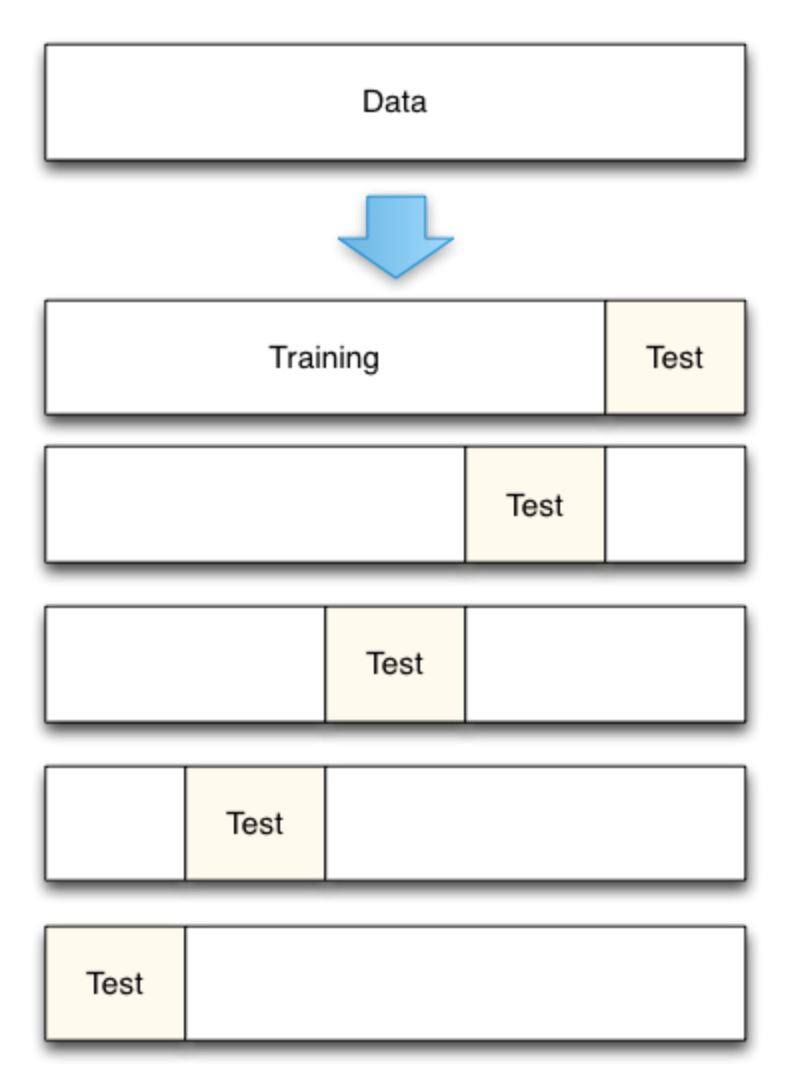

In [40]:
# Image from http://genome.tugraz.at/proclassify/help/pages/XV.html
from IPython.display import Image
Image(filename='images/cv.jpeg', width=300, height=50)

# Illustration of k-fold cross validation.

### Three Way Data Splits

- If model selection and true error estimates are to be computed simaltaneously, the data needs to be divided into three disjoin sets.

- Training set: A set of examples used for learning
- Validation set: A set of examples used to tune the hyperparameters of a classifier.
- Test Set: A set of examples used *** only *** to assess the performance of a fully-trained model.

### Procedure Outline

1. Divide the available data into training, validation and test set
2. Select a model (and hyperparameters)
3. Train the model using the training set
4. Evaluate the model using the validation set
5. Repeat steps 2 through 4 using different models (and hyperparameters)
6. Select the best model (and hyperparameter) and train it using data from the training and validation set
7. Assess this final model using the test set

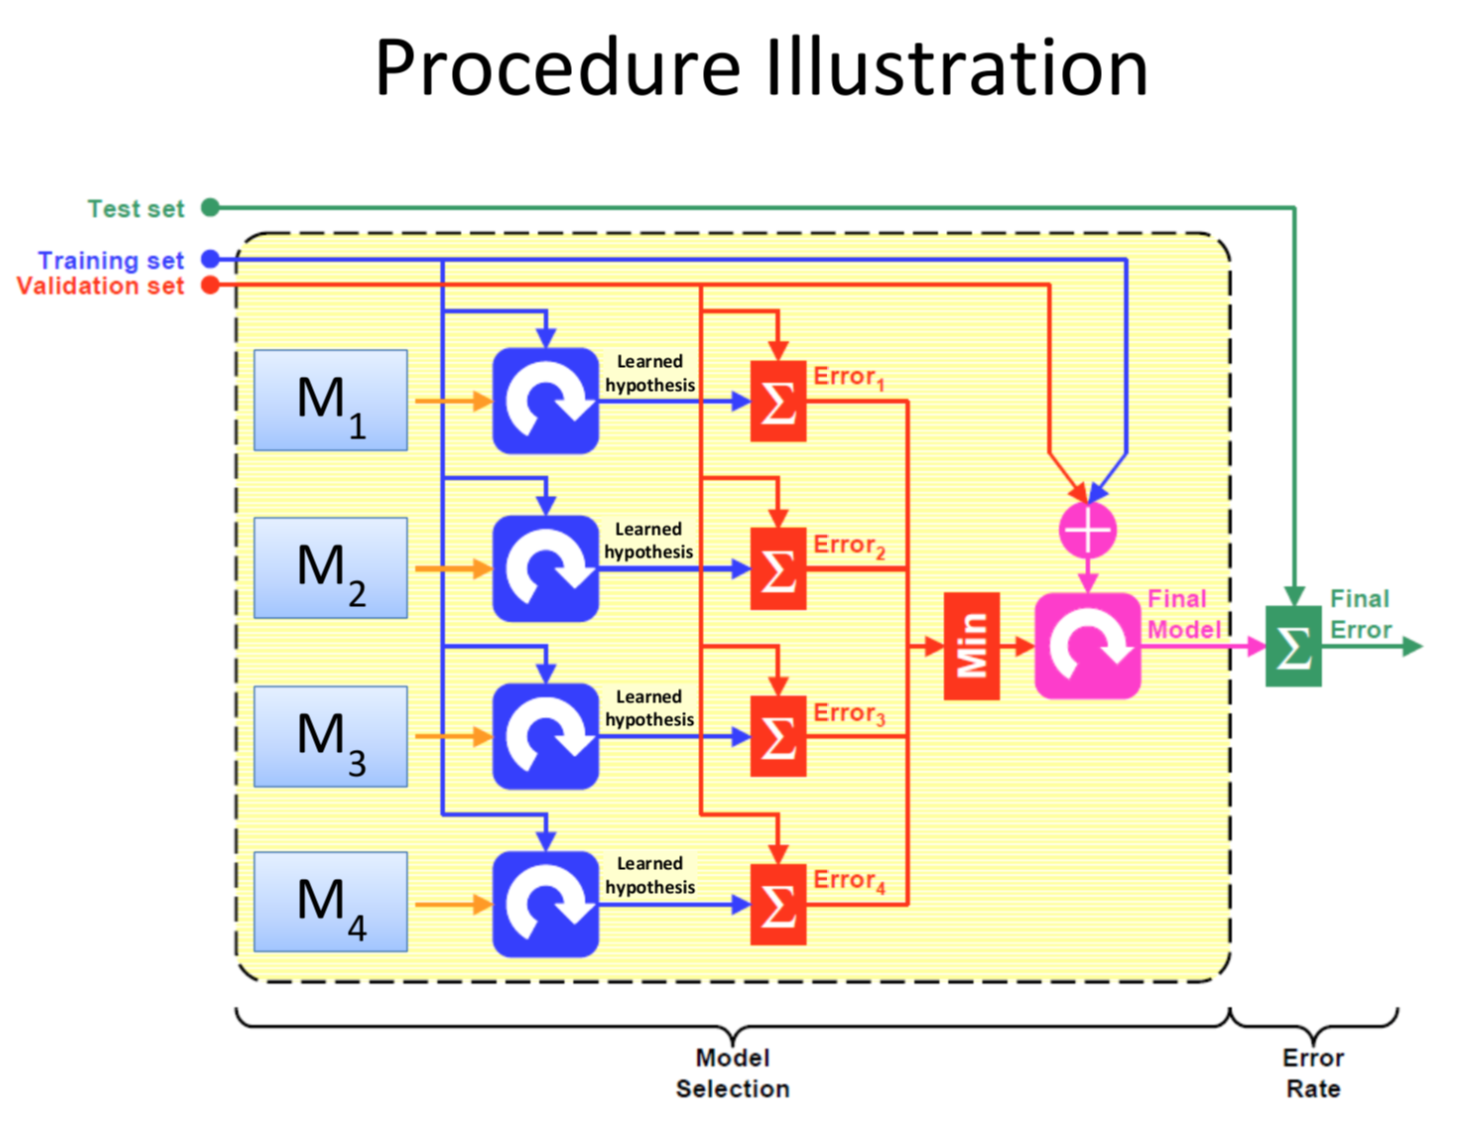

In [33]:
from IPython.display import Image
Image(filename='images/three-way-data-split.png', width=500, height=400)

# Illustration of three way data split procedure.

### How to choose hyperparameters?

Cross Validation is only useful if we have some number of models. This often means constructing models each with a different combination of hyperparameters.

### Random Search
 - Just choose each hyperparameter randomly (possibly within some range for each.)
 - Pro: Easy to implement. Viable for models with a small number of hyperparameters and/or low dimensional data.
 - Con: Very inefficient for models with a large number of hyperparameters or high dimensional data (curse of dimensionality.)

### Grid Search / Parameter Sweep
 - Choose a subset for each of the parameters.
  - Discretize real valued parameters with step sizes as necessary.
 - Output the model with the best cross validation performance. 
 - Pro: "Embarassingly Parallel" (Can be easily parallelized)
 - Con: Again, curse of dimensionality poses problems.

### Bayesian Optimization
 
- Assumes that there is a smooth but noisy relation that acts as a mapping from hyperparameters to the objective function.

- Gather observations in such a manner as to evaluate the machine learning model the least number of times while revealing as much information as possible about the mapping and, in particular, the location of the optimum.

- Exploration vs. Exploitation problem.

### Learning Curves
Provide a visualization for diagnostics such as:
- Bias / variance
- Convergence 

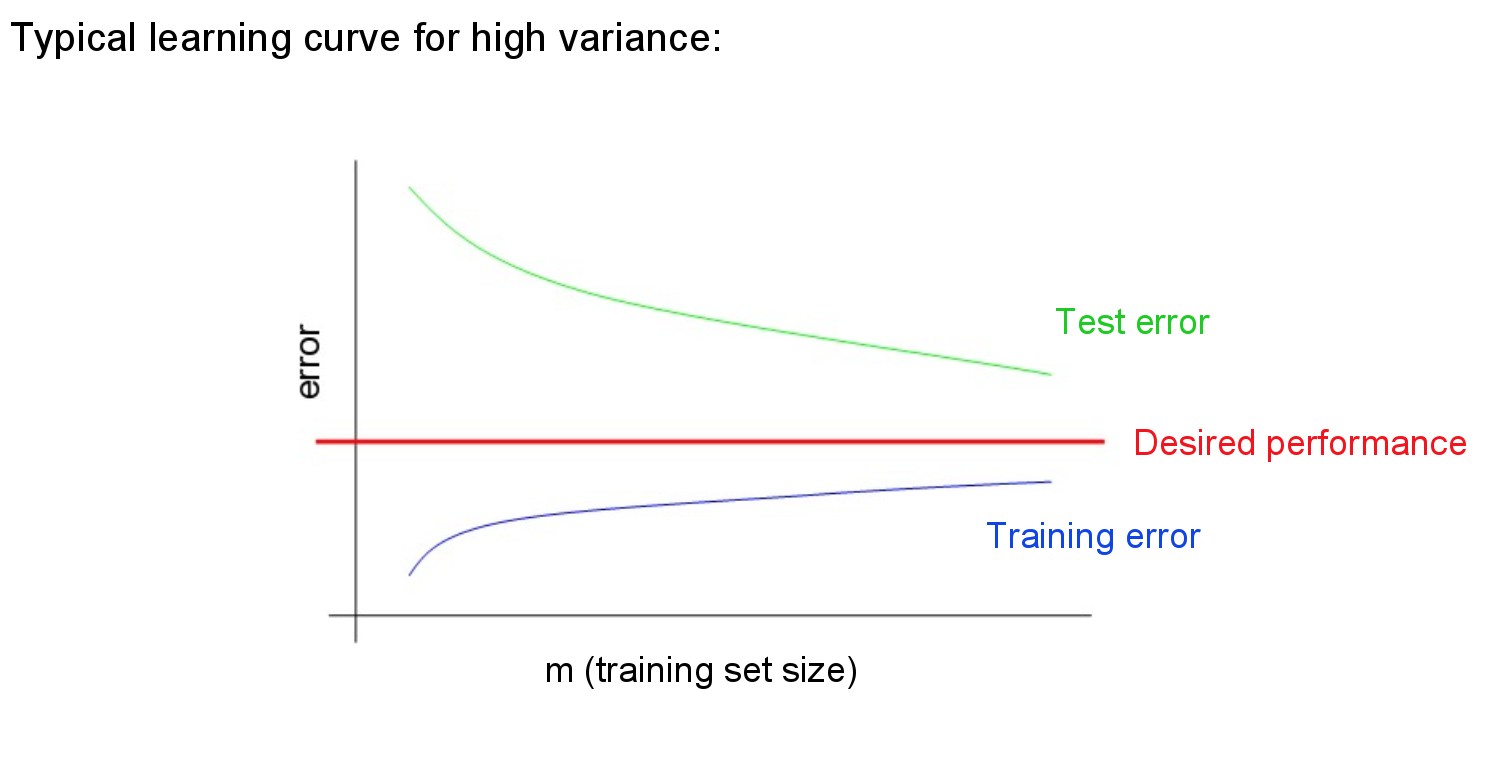

In [27]:
# Image from Andrew Ng's Stanford CS229 lecture titled "Advice for applying machine learning"
from IPython.display import Image
Image(filename='images/HighVariance.png', width=800, height=600)

# Testing error still decreasing as the training set size increases. Suggests increasing the training set size.
# Large gap Between Training and Test Error.

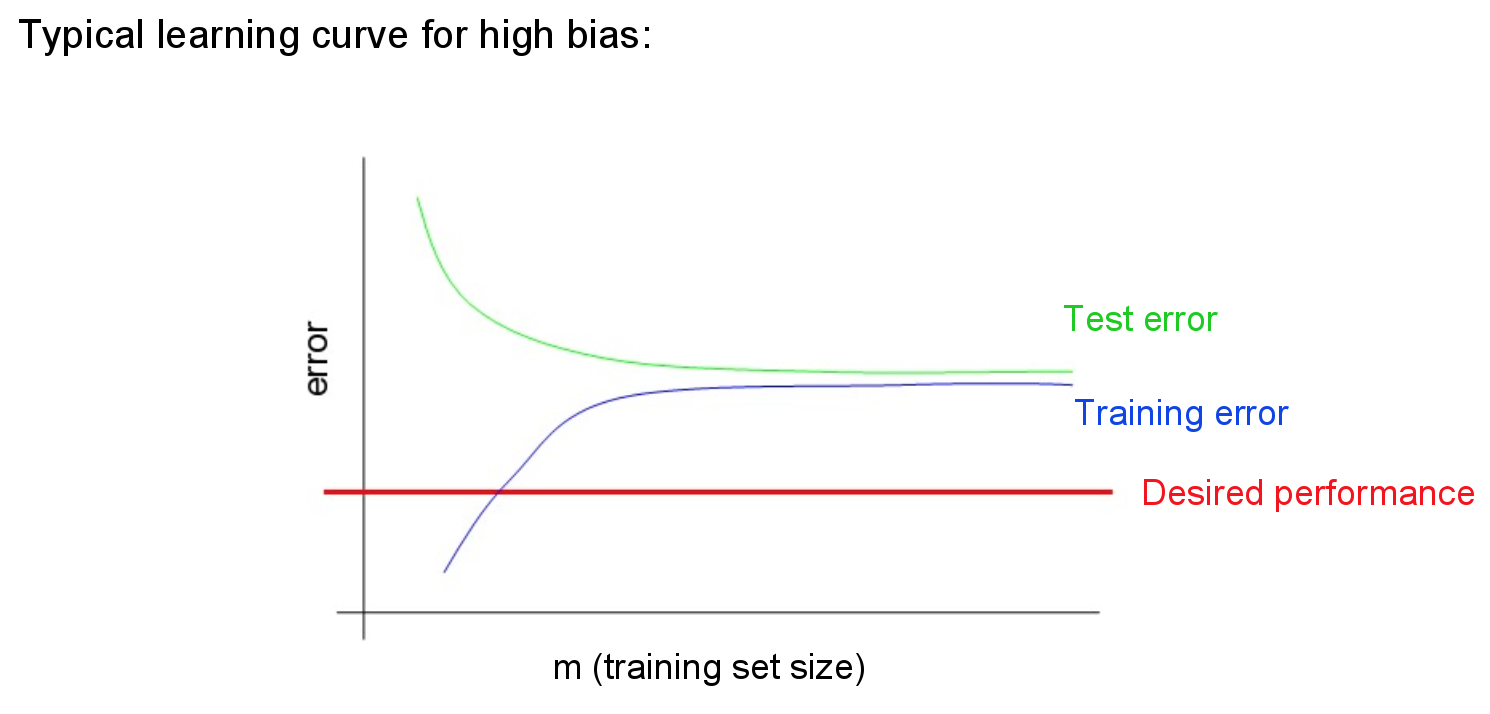

In [28]:
# Image from Andrew Ng's Stanford CS229 lecture titled "Advice for applying machine learning"
from IPython.display import Image
Image(filename='images/HighBias.png', width=800, height=600)

# Training error is unacceptably high.
# Small gap between training error and testing error.

### Convergence

- Approach 1: 
 - Measure gradient of the learning curve.
 - As learning curve gradient approaches 0, the model has been trained. Choose threshold to stop training.

- Approach 2: 
 - Measure change in the model parameters each iteration of the algorithm.
 - One can assume that training is complete when the change in model parameters is below some threshold.

### Diagnostics related to Convergence (1)
- Convergence too slow? 
 - Larger Learning Rate / Step Size. 
 - Try using Newton's method.
  - Note that too large of a step size could also lead to slow convergence (but the learning curves in general will then suggest instability if "oscillations" are occuring.)
 - Decrease batch size if using a batch based optimization algorithm.

### Diagnostics related to Convergence (2)

- Are the learning curves stable? If not: 
 - Decrease learning rate / Step Size.
 - Switch to a batch style optimization algorithm if not already using one (like minibatch gradient descent / gradient descent).
 - Increase batch sizes if already using one.
- Some algorithms always ensure a decrease or increase in the objective function each iterations. Ensure that this is the case if the optimization algorithm being used provides such guarantees.

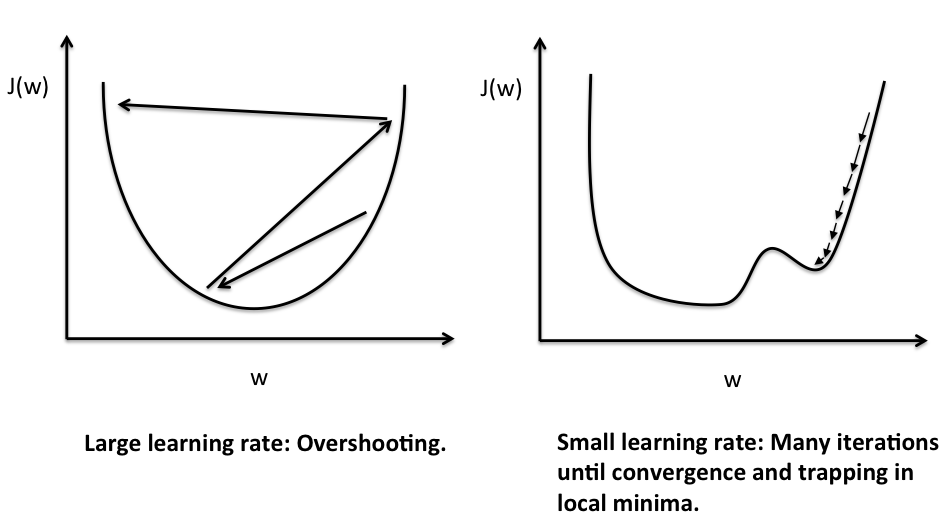

In [25]:
# Image from http://sebastianraschka.com/Articles/2015_singlelayer_neurons.html
from IPython.display import Image
Image(filename='images/perceptron_learning_rate.png', width=800, height=600)

# Illustration of the effect of step size/learning rate of optimization algorithms.

### Diagnostics related to Convergence (3)

- Good to choose optimization algorithms with small numbers of hyperparameters or those that adapt their learning rates (Ex: AdaGrad, AdaDelta)
- However, they offer little control, can be slower and sometimes lead to local maxima/minima.

### Ablative Analysis

- Similar to the idea of cross validation, except for components of a system.

- Example: Simple Logisitic Regression on spam classification gives 94% performance.
 - 95% with spell correction
 - 96% with top 100 most commonly used words removed
 - 98% with extra sender and receiver information 
 - 99% overall performance